# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 1 
Read the dataset given in file named 'bigcity.csv'.

In [297]:
import numpy as np
import pandas as pd

In [298]:
data = pd.read_csv("bigcity.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Unnamed: 0    49 non-null int64
u             49 non-null int64
x             49 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


# Question 2 - Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [299]:
data.isnull().any().sum()

0

In [300]:
data.corr()

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


### The high correlation between u and x indicates that the variable u is a good predictor of variable x

# Question 3 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [301]:
data.columns

X = data.drop("x", axis=1)
y = data["x"]

from sklearn.model_selection import train_test_split
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [302]:
X_train.shape

(39, 2)

In [303]:
X_test.shape

(10, 2)

# Question 4 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [308]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()
lm.fit(X_train, y_train)
print('Model beta zero :',lm.coef_,'beta 1=',lm.intercept_)

Model beta zero : [-0.19934155  1.12761624] beta 1= 16.651750566845323


# Question 5 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

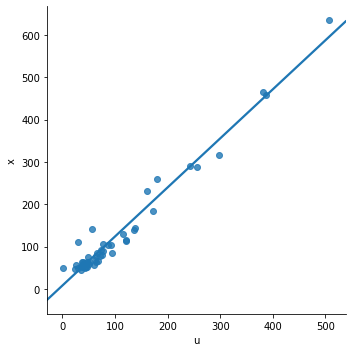

In [310]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.lmplot(x="u",y="x", data=data,ci=None)

# Question 6 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

In [311]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [307]:
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
testRmse = sqrt(mse)
print('mean_squared_error',testRmse)

test_r2 = r2_score(y_test, y_pred)
print('r2 using r2_score=',test_r2)

mean_squared_error 20.792137061935346
r2 using r2_score= 0.9846917329124847


## Question 7 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [312]:
test_r22 = lm.score(X_test, y_test)
print('r2 score using model with test=',test_r22)

r2 score using model with test= 0.9846917329124846


In [313]:
train_r2 = lm.score(X_train, y_train)
print('r2 score using model with train=',train_r2)

r2 score using model with train= 0.9475563782254993


# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Split data into train, test set.

6.Build Model.

7.Apply the model.

8.Evaluate the model.

9.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data 
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [471]:
import numpy as np
import pandas as pd

In [472]:
data = pd.read_csv("students-data.csv",delimiter=';') 
#data.head(5).T
#data.info()
#data['school'].unique()

# Question 2 - Drop missing values 
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [473]:
#data.columns
data.index.name='number'
data.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


In [474]:
print('null values=',data.isnull().any().sum())
#data[data[:] == 'NA'].count() ##no NAs in data

null values= 0


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 3 - Encode all categorical variables to numerical 

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [475]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head().T

number,0,1,2,3,4
school,0,0,0,0,0
sex,0,0,0,0,0
age,3,2,0,0,1
address,1,1,1,1,1
famsize,0,0,1,0,0
Pstatus,0,1,1,1,1
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,0,0,0,1,2
Fjob,4,2,2,3,2


# Question 4 - Convert the continuous values of grades into classes 

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [476]:
data.head(5)   

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,3,2,3,0,0,2,6,2,3,3
1,0,0,2,1,0,1,1,1,0,2,...,4,2,2,0,0,2,4,2,2,3
2,0,0,0,1,1,1,1,1,0,2,...,3,2,1,1,2,2,10,4,5,7
3,0,0,0,1,0,1,4,2,1,3,...,2,1,1,0,0,4,2,12,11,12
4,0,0,1,1,0,1,3,3,2,2,...,3,2,1,0,1,4,4,3,7,7


In [477]:
data[['G1','G2','G3']]=pd.DataFrame(np.where(data[['G1','G2','G3']] >= 10, 1, 0), columns={'G1','G2','G3'})
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,3,2,3,0,0,2,6,0,0,0
1,0,0,2,1,0,1,1,1,0,2,...,4,2,2,0,0,2,4,0,0,0
2,0,0,0,1,1,1,1,1,0,2,...,3,2,1,1,2,2,10,0,0,0
3,0,0,0,1,0,1,4,2,1,3,...,2,1,1,0,0,4,2,1,1,1
4,0,0,1,1,0,1,3,3,2,2,...,3,2,1,0,1,4,4,0,0,0


# Question 5 

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

Answer

In [478]:
X = data.drop("G3", axis=1)
y = data["G3"]

## Visualization

## Question 6

*Plot G2 and G3 and give your understanding on relation between both variables.*

,G2,G3
G2,1.000000,0.896648
G3,0.896648,1.000000


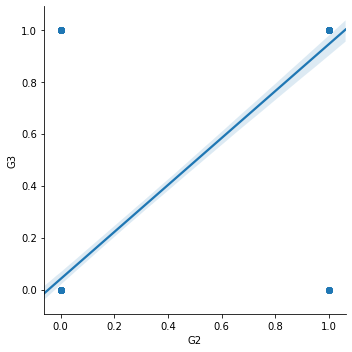

In [479]:
#sns.lmplot(x='G2',y='G3',data=origData)
sns.lmplot(x='G2',y='G3',data=data, scatter=True)
data[['G2','G3']].corr()

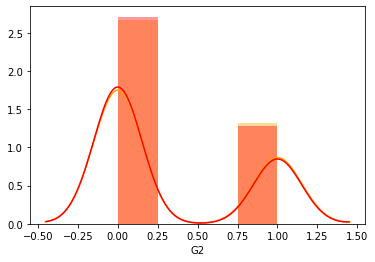

In [482]:
sns.distplot(data['G3'],color='orange')
sns.distplot(data['G2'],color='red')
plt.show()

Hence, there is a strong correalation between the marks obtained by students in subject G2 and G3. 
Whereever the student is pass (1) in G2, he is pass in G3 as well and vice versa.

## Question 7

*Plot the number of students in each school and number of students with different ages in separate plots.*

Text(0.5, 0, 'School')

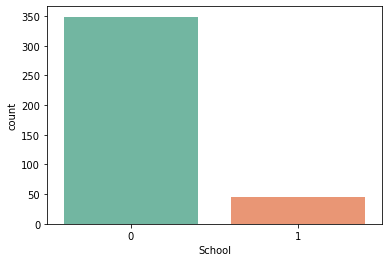

In [488]:
sns.countplot(x="school",data=data,palette="Set2");
plt.xlabel('School')

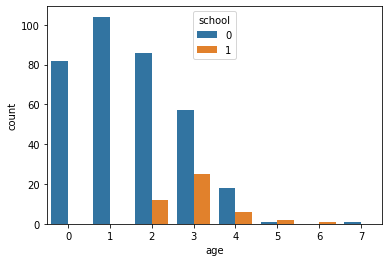

In [492]:
sns.countplot(x="age",data=data,hue='school')

## Question 8 - Training and testing data split

 *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [493]:
X = data.drop("G3", axis=1)
y = data["G3"]

test_size = 0.24
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [494]:
data.shape

(395, 33)

## Question 9 - Model Implementation and Testing the Accuracy 

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [495]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\rashm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [503]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
trainmodel_score = model.score(X_train, y_train)
trainmodel_score 

0.9533333333333334

In [515]:
y_predict = model.predict(X_test)
testmodel_score = model.score(X_test, y_test)
testmodel_score

0.9157894736842105

In [516]:
metrics.confusion_matrix( y_test,y_predict)

array([[53,  3],
       [ 5, 34]], dtype=int64)

In [513]:
#print(model.coef_ ,model.intercept_)

In [517]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_predict, y_test))
rmsePer=rmse/np.mean(y)*100

In [518]:
print('trainmodel_score',trainmodel_score)
print('testmodel_score',testmodel_score)
print('rmse',rmse)
print('rmse Per',rmsePer)
print('Model score r^2',model_score)

trainmodel_score 0.9533333333333334
testmodel_score 0.9157894736842105
rmse 0.29019050004400465
rmse Per 87.50018894456629
Model score r^2 0.9157894736842105
